#### Université de Bordeaux,  Master Mention Informatique

# Analyse, classification et indexation des données: feuille 5

# Machine Learning

#### k-Nearest Neighbors 



## Exercice 1.  k-Nearest Neighbors (from scratch)

Dans ce premier exercice, nous allons coder un algorithme de classification : le $k$-nn.

On commence par importer les modules python :

- numpy : pour des calculs (algèbre linéaire, etc)
- pandas : pour la lecture des fichiers csv, etc 

In [3]:
import numpy as np
import pandas as pa

import warnings
warnings.filterwarnings("ignore")

#### Etape 1 : Distance euclidienne

1. Ecrire une fonction pour calculer la distance euclidienne entre deux points (représentés par des np.array). Attention, le tableau donné comme deuxième paramètre de la fonction contient, en dernière position, la classe de l'élément qu'il représente. Cette information n'est pas utilisée pour le calcul de distance.

In [4]:
def euclidean (point1, point2):
    point2_clean = point2[:-1]
    dist = np.sqrt(np.sum((point1 - point2_clean) ** 2))
    return dist

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [5]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 1])
w = np.array([2, 3, 4, 0])
print(euclidean(u, v)) # 0.0
print(euclidean(u, w)) # 1.7320508075688772

0.0
1.7320508075688772


2. Ecrire une fonction pour calculer les distances d'un point à tous les autres points d'un dataset (matrice numpy - voir exemple)

In [6]:
def distances (point, dataset):
    dist = []
    for p in dataset:
        dist.append(euclidean(point, p))
    return dist


Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous.

In [7]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])
dist = distances(u, dataset)
print(dist) # [0.0, 5.196152422706632, 1.7320508075688772, 3.4641016151377544]

[np.float64(0.0), np.float64(5.196152422706632), np.float64(1.7320508075688772), np.float64(3.4641016151377544)]


#### Etape 2 : Récupérer la liste des $k$ voisins les plus proches

1. Ecrire une fonction <code>voisins</code> permettant de récupérer dans un dataset la liste des $k$-voisins les plus proches d'un point donné.

In [11]:
def voisins (point, dataset, nb_neighbors):
    dist = []
    for p in dataset:
        dist.append((p, euclidean(point, p)))
    dist.sort(key=lambda tup: tup[1])
    knn = [dist[k][0] for k in range (nb_neighbors)]
    return knn

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [12]:
u = np.array([1, 2, 3])
dataset = np.array([[1, 2, 3, 0],
                    [4, 5, 6, 0],
                    [2, 3, 4, 1],
                    [3, 4, 5, 1]])

print(voisins(u, dataset, 2)) # [array([1, 2, 3, 0]), array([2, 3, 4, 1])]

[array([1, 2, 3, 0]), array([2, 3, 4, 1])]


#### Etape 3 : Faire des prédictions

1. Ecrire une fonction <code>classifier()</code> retournant la classe d'un élément $u$.

In [14]:
def classifier(point, dataset, nb_neighbors):
    knn = voisins(point, dataset, nb_neighbors)
    sum_class = 0
    for p in knn:
        if p[-1] == 0:
            sum_class-=1
        else:
            sum_class+=1
    if sum_class < 0:
        return 0
    else:
        return 1

Tester votre fonction. Les instructions suivantes devront produire le résultat ci-dessous. 

In [15]:
u = np.array([4, 5, 6])
dataset = np.array([[1, 2, 3, 0],
                   [2, 3, 4, 1],
                   [3, 4, 5, 0],
                   [4, 5, 6, 1],
                   [1, 2, 3, 0]])

print(classifier(u, dataset, 3)) # 1

1


### Exercice 2. Application

Dans cet exercice, nous allons appliquer l'algorithme écrit ci-dessus pour classifier des iris.
Pour cela, nous commençons par charger le dataset : 

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

Comme indiqué dans sa description, le dataset contient, pour chaque iris, la longueur et la largeur de sa sépale et la longueur et la largeur de sa pétale. Les iris sont ensuite classifiés soit en Iris-Setosa (0), soit en Iris-Versicolour (1) ou encore en Iris-Virginica (2) :
                

<b>Indication :</b> le dataset <code>iris</code> est composé de deux parties : 
 - <code>iris.data</code> décrit les caractéristiques (features)
 - <code>iris.target</code> contient les classes

In [19]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
print(iris.data.shape)

(150, 4)


In [21]:
print(iris.target.shape)

(150,)


Pour des raisons pédagogiques, et pour se focaliser sur l'algorithme, nous avons choisi de l'implémenter pour faire de la classification binaire (c'est ce que réalisent les étapes de l'exercice 1). 

1. Ecrire l'instruction permettant de transformer le problème en un problème de classification binaire :  tous les Iris-Virginica (2) seront classés en Iris-Versicolour (1).

In [22]:
for i in range(iris.target.shape[0]):
    if iris.target[i] == 2:
        iris.target[i] = 1

In [23]:
print(iris.target)
print(iris.target.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
(150,)


2. Afin d'utiliser l'algorithme que vous avez implémenté dans l'exercice 1, créer un tableau <code>dataset</code> dont le contenu sera des iris avec leur classes. Pour pouvoir visualiser le dataset, nous n'allons garder que les deux premières colonnes.

In [39]:
dataset = np.array([[iris.data[k][0], iris.data[k][1], iris.target[k]] for k in range(iris.target.shape[0])])


3. Visualiser le dataset

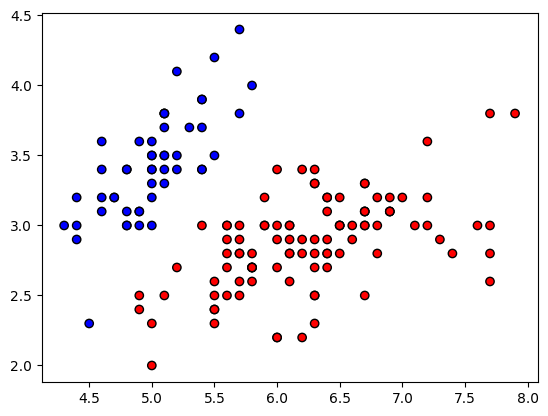

In [51]:
import matplotlib.pyplot as plt
plt.scatter(dataset[:, 0], dataset[:, 1], c=dataset[:, 2], cmap='bwr', edgecolors='k')
plt.show()

4. Soit le vecteur $u(6.5, 2.5)$, utilisez votre algorithme avec $k=3$ pour classer $u$.

In [52]:
u = np.array([6.5, 2.5])
print(classifier(u, dataset, 3))

1


5. Afficher le nouveau point sur le graphique et vérifier visuellement votre résultat.

### Exercice 3 : $k$-nn avec <code>sklearn</code>

Dans cet exercice, nous allons utiliser le classifieur $k$−nn pour apprendre à reconnaître des fruits. Pour cela, nous allons utiliser le dataset fruits disponible au format csv à l’adresse :
               
               https://www.labri.fr/~zemmari/datasets/fruits.csv

1. Charger les données, puis afficher les informations pour vérifier si le dataset ne contient pas de données manquantes.

2. Afficher un graphique pour visualiser les tailles (height) en fonction des largeurs (width), sans tenir compte des classes des points dans un premier temps.

3. Modifier votre graphique pour qu’il affiche les points avec des couleurs différentes en fonction du
nom (<code>fruit_name</code>) du fruit. Vérifier que les classes sont assez équilibrées.

4. Définir X les données composées de la taille, la longueur et la masse des fruits, et Y les noms des
fruits.

5. Découper les données en deux parties : une pour l’entraînement et une pour le test.

6. Entraîner un classifieur $k$−nn à reconnaître les fruits. 

7. Quelle est la valeur par défaut de $k$ ?

8. Utiliser votre jeu de test pour mesurer les performances de votre classifieur (matrice de confusion, accuracy, ...). 

7. Quelle est la nature du fruit dont la masse, la largeur et la taille sont données respectivement par 100, 6.3 et 8? 

8. Trouver une "bonne" valeur pour k.